### Required Packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special.cython_special 
import math as math
import pandas as pd
import itertools as it

from scipy.misc import derivative as dv #unsurprisingly is the derivative function 
import numpy.ma as ma #this was for the joint curves but not implemented anymore 

import statistics as stat #used for shorthand standard deviation and mean calculation (yes im that lazy to calculate mean)

##### Defining the stated parameters from "An analytical approximation of the Bragg curve for therapeutic proton beams", under the assumption that the medium is water.


In [2]:
# eZero is initial Energy, this is effectively x in f(x).
# z is depth (x axis on plots below however)

#Primary stage Parameters - not affected by Beam Initial Energy
p = 1.77
alpha = 0.0022
beta = 0.012
gamma = 0.6
epsilon = 0.0 #ranges 0.0 to 0.2
e_2 = 997 # mass density of the medium 

##### Functions to produce the Curve

In [3]:
 def CalculateSecondary(eZero,z):
        
    #Secondary Stage Parameters
    rZero = alpha*(eZero**p)
    sigE0 = 0.01*eZero
    sigMono = beta*(rZero**0.935)
    sigma = math.sqrt(sigMono**2 + (sigE0**2)*(alpha**2)*(p**2)*((eZero)**(2*p-2)))
    eta = (rZero -z)/sigma
    phiZero = 1 + beta*(rZero)
    
    #Parabolic Cylinder Function 
    curlyD,derivCurlyD = scipy.special.pbdv((1-p), (-1*eta))
    curlyD2,deivCurlyD2 = scipy.special.pbdv(((-1/p)-1),(-1*eta))
    
    #Appending few data to dictionary for DataFrame use 
    secondaryData = {"eZero":eZero, "rZero": rZero,"sigma":sigma,
                     "phiZero":phiZero}
    
    return(secondaryData,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2)


def CalculateCurve(eZero,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2):
    
    curve =  (phiZero)*np.exp((-1*(eta)**2)/4)*(sigma**(1/p))*(math.gamma(1/p))*(
    1/(math.sqrt(2*math.pi)*e_2*p*(alpha**(1/p))*(1 + beta*rZero)))*(
    ((1/sigma)*(curlyD))+((beta/p)+(gamma*beta)+epsilon/rZero)*curlyD2)

    return(curve)

def CalculateXAxis(eZero):

    rZeroMax = alpha*(eZero**p)
    z = np.arange(0,rZeroMax*1.1,0.1)#multiply by 1.1 to get the curve nicer
    
    return(z)

def CalculateXAxisList(eZeroList):

    eZeroMax = max(eZeroList)
    rZeroMax = alpha*(eZeroMax**p)
    z = np.arange(0,rZeroMax*1.1,0.1)#multiply by 1.1 to get the curve nicer
    
    return(z)


def PlotCurves():
#Predefined Variables
    CurveData = pd.DataFrame()
    eZeroValues = []
    curveList = []

#Start:
    numberOfCurves = int(input("how many Curves?"))

#retrieve all the energies first to work out max range for final plot
    for i in range(numberOfCurves):
        eZeroValues.append(int(input("Enter the Initial Energy value in MeV")))

#Calculate the X axis range for the Plot
    z = CalculateXAxisList(eZeroValues)


    for i in range(numberOfCurves):
        
    #Calculating Data
        secondaryData,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2 = CalculateSecondary(eZeroValues[i],z)
        curve = CalculateCurve(eZeroValues[i],rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2)
        curveList.append(curve)
    
    #storing data in Dataframe
        beamData = pd.Series(data = secondaryData,index = secondaryData.keys())
        CurveData = pd.concat([CurveData, beamData.to_frame().T], ignore_index=True)
    
    #plotting
        plt.plot(z,curve, color = "b", label = "nth curve")
    masterCurve = sum(curveList)
    plt.plot(z,masterCurve, color = "k", label = "Cumulative curve")
#details
    plt.xlabel("displacement/cm")
    plt.ylabel("Dose per fluence")
    plt.title("Proton Beam Curves")
    
    plt.legend(loc='best')
    plt.grid(True)

#diplaying the unintuitive dataframe
    print(CurveData.head())
    return(masterCurve)

def PlotCurves2(eZeroTuple):
#Predefined Variables
    eZeroValues = list(eZeroTuple)
    CurveData = pd.DataFrame()
    curveList = []

#Start:
    numberOfCurves = len(eZeroTuple) #3

#retrieve all the energies first to work out max range for final plot

    z = CalculateXAxisList(eZeroValues)
    #z = np.arange(0,200*1.1,0.1)
    for i in range(numberOfCurves): #3
        
    #Calculating Data
        secondaryData,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2 = CalculateSecondary(eZeroTuple[i],z)
        curve = CalculateCurve(eZeroTuple[i],rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2)
        curveList.append(curve)
    
    #storing data in Dataframe
        #beamData = pd.Series(data = secondaryData,index = secondaryData.keys())
        #CurveData = pd.concat([CurveData, beamData.to_frame().T], ignore_index=True)
    
    #plotting
        #plt.plot(z,curve, color = "b")
    masterCurve = sum(curveList)
    plt.plot(z,masterCurve, color = "k")
#details
    plt.xlabel("displacement/cm")
    plt.ylabel("Dose per fluence")
    plt.title("Proton Beam Curves")
    plt.grid(True)
    
    #PlotSimpleBox()

#diplaying the unintuitive dataframe
    #print(CurveData.head())
    return(masterCurve)

def PlotCurves3(eZeroTuple):
#Predefined Variables
    eZeroValues = list(eZeroTuple)
    CurveData = pd.DataFrame()
    curveList = []

#Start:
    numberOfCurves = len(eZeroTuple) #3

#retrieve all the energies first to work out max range for final plot

    z = CalculateXAxisList(eZeroValues)
    #z = np.arange(0,200*1.1,0.1)
    for i in range(numberOfCurves): #3
        
    #Calculating Data
        secondaryData,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2 = CalculateSecondary(eZeroTuple[i],z)
        curve = CalculateCurve(eZeroTuple[i],rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2)
        curveList.append(curve)
    
    #storing data in Dataframe
        #beamData = pd.Series(data = secondaryData,index = secondaryData.keys())
        #CurveData = pd.concat([CurveData, beamData.to_frame().T], ignore_index=True)
    
    #plotting
        plt.plot(z,curve, color = "b")
    masterCurve = sum(curveList)
    plt.plot(z,masterCurve, color = "k")
#details
    plt.xlabel("displacement/cm")
    plt.ylabel("Dose per fluence")
    plt.title("Proton Beam Curves")
    plt.grid(True)
    
    #PlotSimpleBox()

#diplaying the unintuitive dataframe
    #print(CurveData.head())
    return(masterCurve)

def PlotCurvesN(eZeroTuple):
#Predefined Variables
    eZeroValues = list(eZeroTuple)
    CurveData = pd.DataFrame()
    curveList = []

#Start:
    numberOfCurves = len(eZeroTuple) #3

#retrieve all the energies first to work out max range for final plot

    z = CalculateXAxisList(eZeroValues)

    for i in range(numberOfCurves): #3
        
    #Calculating Data
        secondaryData,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2 = CalculateSecondary(eZeroTuple[i],z)
        curve = CalculateCurve(eZeroTuple[i],rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2)
        curveList.append(curve)

    masterCurve = sum(curveList)
    return(masterCurve)

def PlotCurves3(eZero):
#Predefined Variables
    CurveData = pd.DataFrame()

#Start:

#Calculate the X axis range for the Plot
    #z = CalculateXAxisList(eZero)
    z = np.arange(0,(1.1)*(alpha*(eZero**p)),0.1)
    #Calculating Data
    secondaryData,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2 = CalculateSecondary(eZero,z)
    curve = CalculateCurve(eZero,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2)
    
    
    #storing data in Dataframe
    beamData = pd.Series(data = secondaryData,index = secondaryData.keys())
    CurveData = pd.concat([CurveData, beamData.to_frame().T], ignore_index=True)
    return(curve)


def PlotSimpleBox():
    plt.hlines(y=0.1,xmin = 12,xmax = 15, color='r', linestyles='dashed')
    plt.vlines(x=12,ymin = 0,ymax = 0.1, color='r', linestyles='dashed')
    plt.vlines(x=15,ymin = 0,ymax = 0.1, color='r', linestyles='dashed')

def CalculatePeakDoseZValue(curve,z):
    rMax = 0
    peakDose = max(curve)
    for i in range(len(z)):
            if curve[i] == peakDose:
                rMax = i/10
                return(peakDose,rMax)
    

def CalculateMaxCurves(dose, upper, energyData):
    df = energyData[(energyData["rMax"] <= upper)]
    eZero = max(df.eZero)
    curve = PlotCurves3(eZero)
    eInitial = curve[0]
    
    maxCurves = int((dose // eInitial))
    
    return(maxCurves)

#mxNo = CalculateMaxCurves(0.1,15,energyData)
#print(mxNo)

def RetrieveEZeros(df,amountOfCurves):
    eVals = []
    for i in range(amountOfCurves):# take the n curves that make the masterCurve
        eVals.append(df.iloc[0][i+1]) #add the eZeros to a list (plus one as original index col)
        
    return(eVals)

def RestrictDfRanges(df, lower,upper):

    df2 = energyData[(energyData["rMax"] >= lower)]
    df2 = df2[(df2["rMax"] <= upper)]
    #df2.head(25)
    return(df2)

def PlotCustomBox(upper,lower,dose):
    plt.hlines(y=dose,xmin = lower,xmax = upper, color='r', linestyles='dashed')
    plt.vlines(x=lower,ymin = 0,ymax = dose, color='r', linestyles='dashed')
    plt.vlines(x=upper,ymin = 0,ymax = dose, color='r', linestyles='dashed')
    
#def EvaluateHighestEZero()

def CalculateInfo(dose,lower, upper, masterCurve):
    lower = int(lower)
    upper = int(upper)
    avgDistList = []
    z2 = np.arange(lower,upper,0.1)
    regionOfCurve = masterCurve[lower*10:upper*10] #times 10 as z has 0.1 increments 
    
    stdDev = np.std(regionOfCurve)
    
    #Calculating the average distance away from the curve in the y axis and posMetric 
    counter = 0
    
    for i in regionOfCurve:
        avgDist = dose-i
        if avgDist<=0:
            counter = counter +1
            avgDist = avgDist *-1
        avgDistList.append(avgDist)
    avgDist = sum(avgDistList)/len(avgDistList)
    
    posMetric = counter/len(masterCurve[lower*10:upper*10])
    
    return(stdDev, avgDist, posMetric)
    
    #plt.plot(z2,regionOfCurve, color = "g")
    
    

### n Proton beam plotting cell with Cumulative plot line 

In [4]:
x = PlotCurves()

how many Curves?


ValueError: invalid literal for int() with base 10: ''


### n Proton beam plot (black) with cumulative beam (blue) and desired tumor range plot (red rectange).
#### Red rectangle has peak dosagge at 0.1 and lies in the range of 12 to 15 cm

In [ ]:
text = ""
while(text != "."):
    x = PlotCurves()
    PlotSimpleBox()
    plt.show()
    text = input("to Exit press '.', enter anything to continue.")

### Making a df of the curves with different Energy Levels incrementing by 1 from 50 to 200 for later use


   eZero  peakDose  rMax
0   50.0  0.074870   2.2
1   51.0  0.073825   2.2
2   52.0  0.075793   2.3
3   53.0  0.076328   2.4
4   54.0  0.074695   2.5


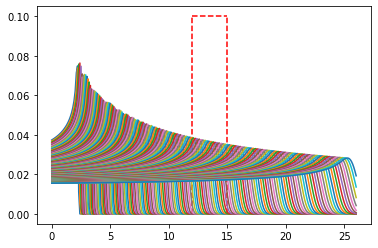

In [5]:

energyData = pd.DataFrame()
    
z = np.arange(0,alpha*(200**p),0.1)
for i in range(50,201): #lets just say 200 as 200 MeV is the max aproxiamted 
    eZero = i
    secondaryData,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2 = CalculateSecondary(eZero,z)
    curve = CalculateCurve(eZero,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2)
    plt.plot(z,curve)
    peakDose,rMax = CalculatePeakDoseZValue(curve,z)
    datum = {"eZero": i, "peakDose":peakDose,"rMax": rMax}
    beamData = pd.Series(data = datum,index = datum.keys())
    energyData = pd.concat([energyData, beamData.to_frame().T], ignore_index=True)
print(energyData.head())
energyData.to_csv("energyData.csv")
PlotSimpleBox()


#### Best Curve selection for n curves in custom range.

In [6]:
#plotting the Target Box:
amountOfCurves = int(input("how many curves? "))


option = int(input("Choose Simple Box? \n 1:yes \n 0:no \n"))

if option == 0:
    upper = round(float(input( "upper Bound Value (float): ")),2)
    lower = round(float(input( "lower Bound Value (float): ")),2)
    dose = round(float(input( "Dose Value (float): ")),2)
    PlotCustomBox(upper,lower,dose)
    
elif option == 1:
    PlotSimpleBox()
    upper = 15
    lower = 12
    dose = 0.1 
    
df = RestrictDfRanges(energyData,lower,upper) 

#redefined vars:
cdf = pd.DataFrame() #dataFrame to contain the energy Values and stats about the master curve 
mxNo = CalculateMaxCurves(dose, upper, energyData) #max # of curves i should use to get the master curve else dosage too high
eZeroOne = None
eZeroTwo = None
eZeroThree = None
eZeroFour = None
eZeroFive = None
eZeroList = []
initialIndex = df.index[0]

#now find all the non ordered sampling with replacement samples. hence n = how many curves in df
# r = amount of curves testing - 1, (in this case 4-1 = 3 ). in my case here 1140 different options following the 
# formula. 

howManyCurves = len(df.index) -1 # the amount of curves to iterate through 
print("total amount of curves to choose from = "+ str(howManyCurves))

lst = list(range(1,howManyCurves+1)) # all the values 
combList = list(it.combinations_with_replacement(lst,amountOfCurves))
combList.reverse() # Not needed 
print("Total amount of combinations = " + str(len(combList))) #this is now all the permutations i need 

for combo in combList:
    
    tempList = []#this holds the eZero values for the combo chosen 

    
    for index in combo: 
        tempList.append(df.eZero[index+initialIndex -1]) # add the eZeros from the df 
    
    masterCurve = PlotCurvesN(tempList) #returns the masterCurve without plotting or printing anything 
    stdDev, avgDist, posMetric= CalculateInfo(dose,lower, upper,masterCurve) # Calculate the info for the df later
    
    for i in range(amountOfCurves): # for all the curves 
        eZeroList.append(tempList[i]) #add the eZeros to a list 
        
    #append data to cdf
    if amountOfCurves == 2:
        eZeroOne = tempList[0];eZeroTwo = tempList[1]
        
        datum = {"eZeroOne": eZeroOne,"eZeroTwo":eZeroTwo,
             "standardDeviation":stdDev,"averageDisplacementFromDose":avgDist,"positiveMetric":posMetric}
    
    elif amountOfCurves == 3:
        eZeroOne = tempList[0];eZeroTwo = tempList[1];eZeroThree = tempList[2]
        
        datum = {"eZeroOne": eZeroOne,"eZeroTwo":eZeroTwo ,"eZeroThree":eZeroThree,
             "standardDeviation":stdDev,"averageDisplacementFromDose":avgDist,"positiveMetric":posMetric}
    
    elif amountOfCurves == 4: 
        eZeroOne = tempList[0];eZeroTwo = tempList[1];eZeroThree = tempList[2];eZeroFour = tempList[3];
        
        datum = {"eZeroOne": eZeroOne,"eZeroTwo":eZeroTwo ,"eZeroThree":eZeroThree ,"eZeroFour":eZeroFour,
             "standardDeviation":stdDev,"averageDisplacementFromDose":avgDist,"positiveMetric":posMetric}
    
    elif amountOfCurves ==5:
        eZeroOne = tempList[0];eZeroTwo = tempList[1];eZeroThree = tempList[2];eZeroFour = tempList[3];eZeroFive = tempList[4]
        
        datum = {"eZeroOne": eZeroOne,"eZeroTwo":eZeroTwo ,"eZeroThree":eZeroThree ,"eZeroFour":eZeroFour,
                 "eZeroFive": eZeroFive,"standardDeviation":stdDev,"averageDisplacementFromDose":avgDist,
                 "positiveMetric":posMetric}
    
    beamData = pd.Series(data = datum,index = datum.keys())
    cdf = pd.concat([cdf, beamData.to_frame().T], ignore_index=True)
    
    
#sort the df by positiveMetric values
df2 = cdf.sort_values('positiveMetric', ascending = False)

if df2.positiveMetric[0] == 0: #if the curve fails to be greater than the dose needed anywhere, 
    df2 = df2.sort_values('averageDisplacementFromDose', ascending  = True) # sort by smallest average displacement instead

for j in range(3): #for the top 3 curves  
    eVals = []          
    for i in range(amountOfCurves): # take the n curves that make the masterCurve
        eVals.append(df2.iloc[j][i]) #add the eZeros to a list 
    a = PlotCurves2(eVals) #Plot the List 

df2.head(3)

how many curves? 


ValueError: invalid literal for int() with base 10: ''

# 

#### plotting out the best curve only

In [7]:
for j in range(1): #for the top 3 curves  
    eVals = []          
    for i in range(amountOfCurves): # take the n curves that make the masterCurve
        eVals.append(df2.iloc[j][i]) #add the eZeros to a list 
    a = PlotCurves2(eVals) #Plot the List 

df2.head(1)
PlotCustomBox(upper,lower,dose)

NameError: name 'amountOfCurves' is not defined

In [8]:
df

NameError: name 'df' is not defined

##### Tuesday 14/0/6/22 - Aproximations of the Curve, derivatives.

Primary use of this is to mathematically find the area under the curve and the stationary points. Since writing the code has proved obselete but I am hesitant to remove code as there might be a need for it later.


#### Implementing Aproximation and Derivative functions:
##### Note:
The aproximation is very specifically only for a PBC of 150MeV as the eZero change the greatest displacement of the curve and also the peak of the curve - every specific eZero requires a specific aproximation.  


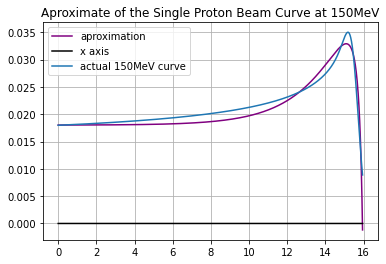

In [9]:

from scipy.misc import derivative
  
# defining the function
def Function(x):
    a = 7.9
    b = 8.1
    c = 120
    

    h = +2.5
    k = 0.00015
    q = 2
    y = k*((((x/q)-a)/((x/q)-b))*(np.exp((x/q)-h))+c)
    
    return (y)

def DerivativeFunctionEquation(x):
    y = (3*np.exp(x/2)/(40000*((5*x-81)**2)))*(25*x**2-800*x+6379)*(np.exp((x-5)/2))
    for i in y:
        if math.isnan(i) == True:
            i = 0
    return (y)
    
def XAxis(x):
    return (x*0) #returns y = 0 line (x axis)
  
# calculating its derivative
def Deriv(x):
    return derivative(Function, x)
def SecondDeriv(x):
    return derivative(DerivativeFunctionEquation,x)

# defininf x-axis intervals
y = np.arange(0, 15.95,0.01)
  
# plotting the function
plt.plot(y, Function(y), color='purple', label='aproximation')
plt.plot(y,XAxis(y), color = "k", label = "x axis")
plt.title("Aproximate of the Single Proton Beam Curve at 150MeV")

secondaryData,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2 = CalculateSecondary(150,y)
curve = CalculateCurve(150,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2)
plt.plot(y,curve, label = "actual 150MeV curve")
  
# formatting
plt.legend(loc='upper left')
plt.grid(True)

#### The aproximation will do,
for the next steps i'll make the aproximate curve, which i shall call "AC" from now on, equal to that of the cumulative curve made from the eZero values of the curve that best covers the SimpleBox from "plotting out the best curve only" cell
 for refernece see below 
 
 ##### NOTE TO SELF:
Calculate Percentage error upon implementing the aproximation in furhter code as the cumulative curve will have the error carried forward.

In [10]:
a = PlotCurves2(eVals)
PlotSimpleBox()

ValueError: max() arg is an empty sequence

Target eValues are those that make up this curve hence consituents of eVals

In [11]:
eVals

[]

Before going any further im going to slightly backtrack to the point of making the AC which was that it is much easier to calculate the derivative of the AC than the derivative actual Proton beam curve that the AC represents.

### Derivative of AC

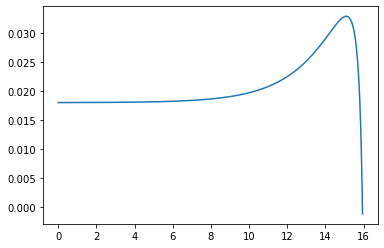

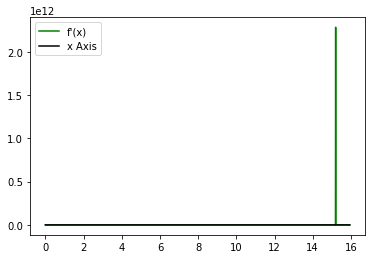

In [12]:
# plotting AC
plt.figure()
plt.plot(y, Function(y),label = "f(x)")
plt.show()

#Plotting Derivative of AC
plt.figure()
plt.plot(y, Deriv(y), color='green', label="f'(x)")
plt.plot(y,XAxis(y), color = "k", label = "x Axis")
plt.legend(loc = "best")
plt.show()


#### note: 
the same range of x values have been used but we should disregard all values of the curve past the point P s.t. the line is increasing (second derivative of the AC is positive) as there is an asymtote in the AC that is being used to have such a clean "decay tail" of the AC. The next cell will fix this

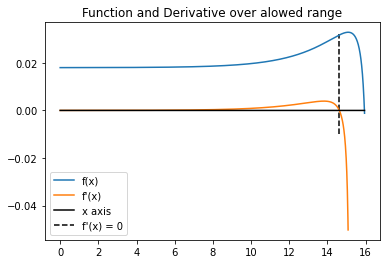

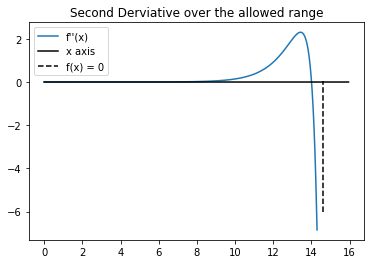

In [13]:
upperLim = 0
smallestValue = 100

#trimming the derivative function range of values down
for i in range(len(Deriv(y))):
    if Deriv(y)[i] == min(Deriv(y)):
        upperLim = i/100

#trimming the Second derivative function range of values down
for i in range(len(SecondDeriv(y))):
    if SecondDeriv(y)[i] == min(SecondDeriv(y)):
        upperLim2 = i/100

y3 = np.arange(0,upperLim2-0.9,0.01)
y2 = np.arange(0,upperLim-0.1,0.01)

for i in range(len(Deriv(y2))):
    if i >10 and (Deriv(y2)[i])>0 and (Deriv(y2)[i]) <= smallestValue:
        smallestValue = i/100
        
plt.figure()
plt.title('Function and Derivative over alowed range')

plt.plot(y,Function(y), label = 'f(x)') #f(x)
plt.plot(y2, Deriv(y2), label = "f'(x)") #derivative
plt.plot(y,XAxis(y),color = "k", label = "x axis")
plt.vlines(x=smallestValue,ymin = -0.01,ymax = 0.032, color='k', linestyles='dashed', label = "f'(x) = 0")
plt.legend(loc = "best")

plt.show()
plt.figure()

plt.plot(y3,SecondDeriv(y3), label = "f''(x)") #second derviv
plt.plot(y,XAxis(y),color = "k", label = "x axis")
plt.vlines(x=smallestValue,ymin = -6,ymax = 0.032, color='k', linestyles='dashed', label = "f(x) = 0")
plt.legend(loc = "best")
plt.title("Second Derviative over the allowed range")

plt.show()


##### Wednesday 15/10/22
time was spent sorting the graphs in case of later use however after the phonecall (14/06.2022), progress on probability of the curve seems more pressing. 
Next steps will include,

refering to individual Proton Beam curves as PDFs,

Normalising the individual Proton Beam curves in some cell,

fixing a distribution (Normal most likely if converting the PBC to a distribution is too hard) to the curve,

looking at the pdf of the cumulative curve (Cumulative PDF - CPDF) fixing some cdf to know the **P** that the radiation lies within the range. 

--Not sure how the sampling and Monte Carlo/ ML fits in just yet, this scheme of work seems to make sense


## Probability
### Step 1: Defineing what optimised system to work on

For now i will be using curves based off the 4 curve plot on a simple Box from the above cell "#### Best Curve selection for n curves in custom range".
Selecting 4 curves, Simple Box grants the same dataFrame that i have read into the cell below to from csv for safety.


In [135]:
df = pd.read_csv("4CurvesSimpleBoxDF.csv")
df = df.rename(columns = {"Unnamed: 0":"Original Index"})
df.head()
amountOfCurves = 4 # from above

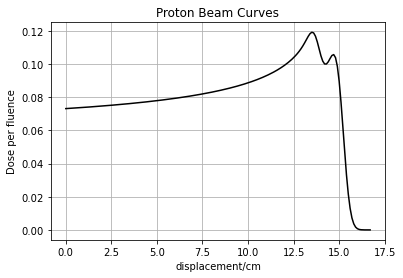

In [136]:
a = RetrieveEZeros(df, amountOfCurves)
masterCurve = PlotCurves2(a)

#### Normalising:
Lets first Normalise the PBC to make the area under the curve = 1 (lets also take eZero as 140 MeV as an example).

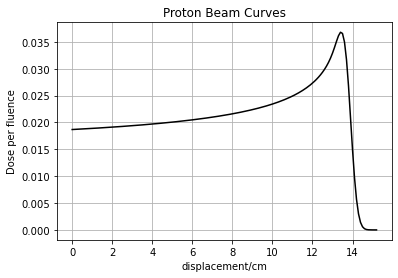

In [137]:
eZero = [140] 
X = PlotCurves2(eZero)

#### Slightly imporving previous functions

I feel like its bad practive to keep dupliacting the PlotCurves function , going back to fix them.


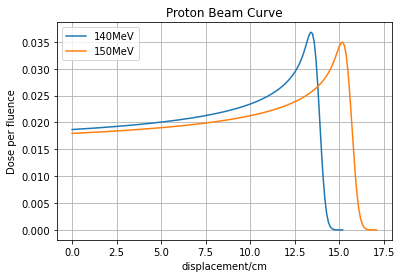

In [138]:
def CalculateCurveAlpha(eZero): #Send in MeV, returns curve values.
    
    #Predefined Variables
    z = CalculateXAxis(eZero)
    
    #Calculating the Curve buisness 
    secondaryData,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2 = CalculateSecondary(eZero,z)
    curve = CalculateCurve(eZero,rZero,sigE0,sigMono,sigma,eta,phiZero,curlyD,curlyD2)
    
    return(curve)

def PlotCurve(eZero):
    
    curve = CalculateCurveAlpha(eZero)
    z = CalculateXAxis(eZero)
    plt.plot(z,curve, label = (str(eZero)+ "MeV"))
    plt.xlabel("displacement/cm")
    plt.ylabel("Dose per fluence")
    plt.title("Proton Beam Curve")
    
    plt.legend(loc='best')
    plt.grid(True)
    
    

PlotCurve(140)
PlotCurve(150) 

##### Example of how to use the new Functions for later use

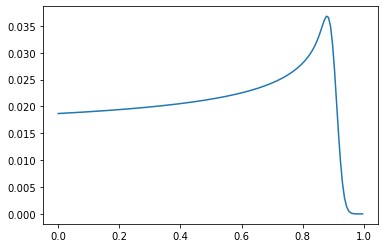

In [139]:
eZero = 140
X = CalculateCurveAlpha(eZero)
z = np.arange(0,1,0.00655)
plt.plot(z,X)
#PlotCurve(eZero)

#### Thursday

There has been an issue such that when transforming the Proton beam curve to a PDF we look to make the area under the curve =1. As the curve equation contains a Parabolic Cylinder function this make it rather hard to integrate. Hence, I plan to do a more brute for aproach to find the an aproximation of the integral by summing over all the increments of the curve Data Points and plotting. 

AC was considered here as integrating the AC is much easier, however the rudimentary integral aproach worked nicely and has no error carried forward by using the aproximation of the PBC.


### PDF 

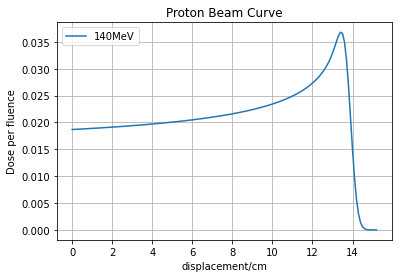

Area uner the curve = 0.9999999999999996


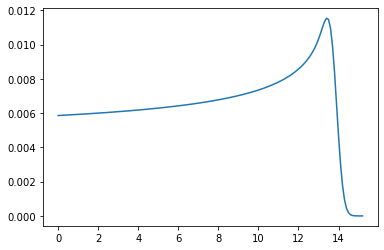

In [140]:
PlotCurve(140)
plt.show()
plt.figure()
curve = CalculateCurveAlpha(140)
sm = sum(curve)
curve = curve/sm
z = CalculateXAxis(140)
plt.plot(z,curve)
sm = sum(curve)
print("Area uner the curve = "+ str(sm))

#### Explanation.
What we see in the above cells is taking a Proton Beam Curve (PBC) of certain eZero, plotting, summing over the curve, {what i call} Normalising the distribution, and hence this is now the equivalent PDF of the PBC as the area under the curve adds to 1. Hurray! Lets make this into a function. 

In [141]:
def CalculatePDFofPBC(eZero):
    pbc = CalculateCurveAlpha(eZero)
    sm = sum(pbc)
    pdf = pbc/sm
    return(pdf)

def StandardNicePlot(rnge,curve,eZero,title,yLab):
    plt.plot(rnge,curve,label = (str(eZero)+ "MeV"), color = "k")
    plt.plot(z,curve, )
    plt.xlabel("displacement/cm")
    plt.ylabel(yLab)
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    
    
    

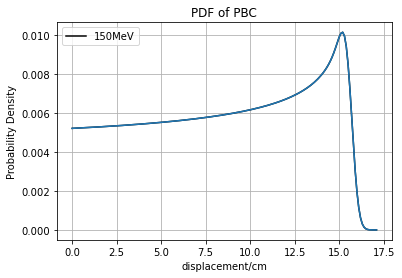

In [142]:
eZero = 150
pdf = CalculatePDFofPBC(eZero)
z = CalculateXAxis(eZero)
StandardNicePlot(z,pdf,eZero,"PDF of PBC", "Probability Density")

Fab. Now we are on a much more realistic approach of finding the Probability of a Cumulative Proton Beam curve to have a dosage in some tumor region.

The next step is to find the CDF of the distribution as some Value.

### CDF of PBC
CDF = integral of PDF from lower bound to value we want to depict, hence we need to find the integral of the Proton Beam Curve. Here lies the issue as finding the integral of the PBC relies of finding the integral of the **Parabolic cylinder function** - which i dont want to do.

**Solution:** manually add up the values of the curve to compute the CDF values but skip the "CDF equation" step.



In [143]:
#from before pdf = the pdf of some PBC of some eZero

def CalculateCDFofPBC(pdf):
    cdf = []
    sm = 0

    for i in pdf:
        sm = sm + i
        cdf.append(sm)
    return(cdf)

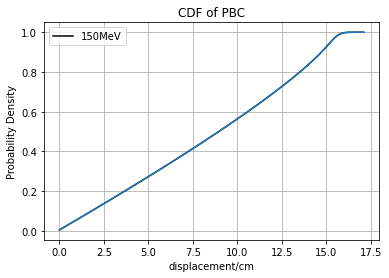

In [144]:
cdf = CalculateCDFofPBC(pdf)
StandardNicePlot(z,cdf,eZero,"CDF of PBC", "Probability Density")

### Example: PDF and CDF of some PBC 


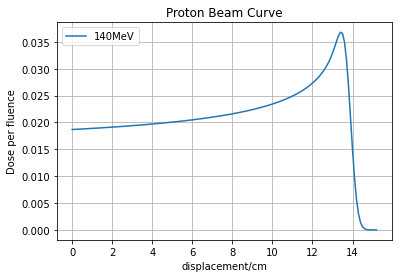

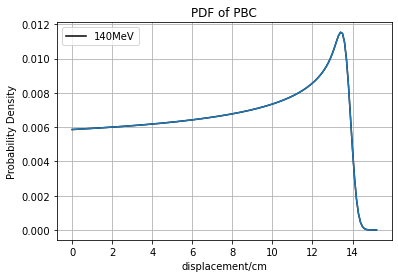

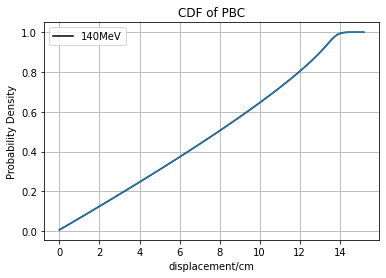

In [145]:
eZero = 140 # so we know what we are dealing with lets plot the curve
PlotCurve(eZero) 
plt.figure()

pdf = CalculatePDFofPBC(eZero)
z = CalculateXAxis(eZero)
StandardNicePlot(z,pdf,eZero,"PDF of PBC", "Probability Density")

plt.figure()
cdf = CalculateCDFofPBC(pdf)
StandardNicePlot(z,cdf,eZero,"CDF of PBC", "Probability Density")

#### Practical example:
What is the probability that a PBC with initial energy of 140MeV deliver its radiation between 10 and 12 cm?


In [146]:
lowerBound = 10
upperBound = 12
incrementFactor = 10
eZero = 140
z = CalculateXAxis(eZero)
pdf = CalculatePDFofPBC(eZero)
cdf = CalculateCDFofPBC(pdf)
Prob = round(cdf[upperBound*incrementFactor] - cdf[lowerBound*incrementFactor-1],2)

print("The Probability that the PBC of initial energy of 140MeV delivers its dosage"
      "within the range of 10cm to 12cm is:",Prob)

The Probability that the PBC of initial energy of 140MeV delivers its dosagewithin the range of 10cm to 12cm is: 0.17


This will be used later so I will most likely make a function with this similar process in it.

### Cumulative Curve Probabilities

Unfortunately our Proton beams arent singular beams. Thankfully we can cunstruct a PDF of the cumulative Proton beam curve and then a rather confusingly named Cumulative Distribution Fucntion for the Cumulative curve.

Still working on the basis of finding the Probability of the most optimal curve from df


In [147]:
print(df.head(1))
print(eVals)

   Original Index  eZeroOne  eZeroTwo  eZeroThree  eZeroFour  \
0             332     140.0     147.0       147.0      148.0   

   standardDeviation  averageDisplacementFromDose  positiveMetric  
0           0.006385                     0.007205        0.933333  
[140.0, 147.0, 147.0, 148.0]


by knowing the range over which the tumor may be locatied we can then find the individual proabability that each curve lies within that range, sum the probabilities up, and divide by (amount of curves) (in our case with eVals that would be 4), and hence obtain the probability that the Combined peak is within that range.

For now as we are looking at the df DataFrame we assume theTumor region is over the SimpleBox() region, dose = 0.1, lower = 12, upper = 15.

#### Implementing the function to asses the Probability within a given range of a PBC

In [148]:
def CalculateProbWithinRange(eZero,lower,upper):
    incrementFactor = 10
    z = CalculateXAxis(eZero)
    pdf = CalculatePDFofPBC(eZero)
    cdf = CalculateCDFofPBC(pdf)
    prob = round(cdf[upper*incrementFactor] - cdf[lower*incrementFactor-1],2)
    return(prob)

In [149]:
prob = CalculateProbWithinRange(140,12,15)
print("The Probability that the PBC of initial energy of "+str(eZero)+"MeV delivers its dosage"
      "within the range of " + str(lower) + "cm to "+str(upper)+"cm is: " + str(prob)+" (2 d.p)")

The Probability that the PBC of initial energy of 140MeV delivers its dosagewithin the range of 12cm to 15cm is: 0.21 (2 d.p)


In [150]:
lower = 12
upper = 15

probList = []
for i in eVals:
    probList.append(CalculateProbWithinRange(i,lower,upper))
masterCurveProb = round(sum(probList)/4,2) # once a calculation is taken to some decimal place you can only 
#take the answer to that decimal place too hence the round() function here

print(masterCurveProb)

0.25


The above cell now produces the Probability of the masterCurve (which is the Proton Beam with many individual Proton beams) being within the region. Hence, there is a 0.25 Probability that ...

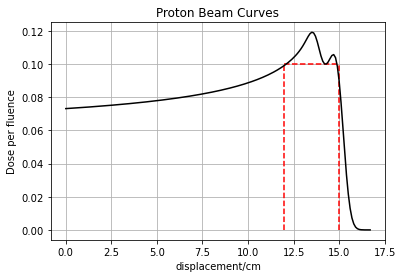

In [151]:
a = PlotCurves2(eVals)
PlotSimpleBox()

.... Thats the curve above delivers the dosage into the required range. 

Another way to do the same calculation is to handle the masterCurve by itself, and find it's PDF, CDF etc.


Probability of the PBC to deliver doseage within range = 0.25


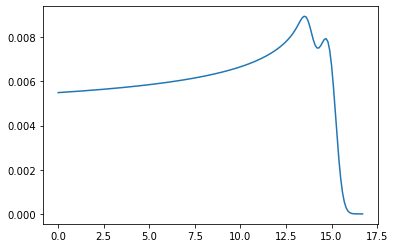

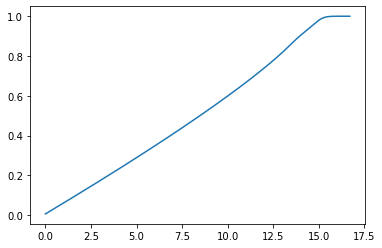

In [152]:
incrementFactor = 10
upper = 15
lower = 12
sm = sum(a)
b = a/sm
z = CalculateXAxis(max(eVals))
plt.plot(z,b)
cdf = CalculateCDFofPBC(b)
plt.figure()
plt.plot(z,cdf)
prob = round(cdf[upper*incrementFactor] - cdf[(lower*incrementFactor)-1],2)
print("Probability of the PBC to deliver doseage within range = "+ str(prob))

There's no real difference in the methods, but one does not use a for loop hence if either can be used, for more amount fo curves CalculateProbWithinRange2() is slightly more efficient.

## Seocond Implementation of a function to asses the Probability within a given range of a PBC¶

In [153]:
def CalculateProbWithinRange2a(masterCurve,lower, upper,eValsList):#eValsList is the list of eVals that make up masterCurve
    incrementFactor = 10
    sm = sum(masterCurve)
    pdf = masterCurve/sm
    z = CalculateXAxis(max(eValsList))
    plt.figure()
    StandardNicePlot(z,pdf,eZero,"PDF of PBC", "Probability Density")
    cdf = CalculateCDFofPBC(pdf)
    plt.figure()
    StandardNicePlot(z,cdf,eZero,"CDF of PBC", "Probability Density")
    #read cell below to understand this if statement
    if(len(cdf)<(upper*incrementFactor)):
        prob = round((cdf[len(cdf)-1] - cdf[(lower*incrementFactor)-1]),2)
    else:
        prob = round(cdf[upper*incrementFactor] - cdf[(lower*incrementFactor)-1],2)
    return(prob)

## same function without the Plots:

def CalculateProbWithinRange2b(masterCurve,lower, upper,eValsList):#eValsList is the list of eVals that make up masterCurve
    incrementFactor = 10
    sm = sum(masterCurve)
    pdf = masterCurve/sm
    z = CalculateXAxis(max(eValsList))
    cdf = CalculateCDFofPBC(pdf)
    #read cell below to understand this if statement
    if(len(cdf)<(upper*incrementFactor)): 
        prob = round((cdf[len(cdf)-1] - cdf[(lower*incrementFactor)-1]),2)
    else:
        prob = round(cdf[upper*incrementFactor] - cdf[(lower*incrementFactor)-1],2)
    return(prob)

Unofortunately there needs to be that if statement as in the case where the masterCurve's x axis range ends before reaching the upper limit line, we have an out of bound index error hence we can just use the last term in the cdf list of values instead due to the nature of the second tail.  

In [154]:
eVals = [140,147,147,148]
masterCurve = PlotCurvesN(eVals)
prob = CalculateProbWithinRange2b(masterCurve, 12, 15, eVals)
print("Probability = "+str(prob))

Probability = 0.25


##### Appending Probability Data to DataFrame.

Seeing as we can work out this data, it will be useful to append it to the df of all the curves that satisfy the 4 PBC simpleBox plot

In [155]:
probList = []

for i in range(0,len(df)):
    eVals =[]
    for j in range(4):
        eVals.append(df.iloc[i][j+1])
        
    masterCurve = PlotCurvesN(eVals)
    probList.append(CalculateProbWithinRange2b(masterCurve,12,15,eVals))

In [156]:
df["probabilityOfSuccess"] = probList
df.head()


,Original Index,eZeroOne,eZeroTwo,eZeroThree,eZeroFour,standardDeviation,averageDisplacementFromDose,positiveMetric,probabilityOfSuccess
0,332,140.0,147.0,147.0,148.0,0.006385,0.007205,0.933333,0.25
1,333,140.0,147.0,147.0,147.0,0.006570,0.008017,0.933333,0.25
2,503,139.0,146.0,146.0,147.0,0.008299,0.008381,0.933333,0.25
3,338,140.0,146.0,146.0,147.0,0.008787,0.009923,0.933333,0.25
4,504,139.0,146.0,146.0,146.0,0.009670,0.009589,0.900000,0.25


##### Note:
Once this code has been reviewed appending the probabilityOfSuccess column to the csv file may be useful. 